# Minesweeper Statistics

*This notebook first appeared as a [blog post](//betatim.github.io/posts/bumping) on [Tim Head](//betatim.github.io)'s blog.*

*License: [MIT](http://opensource.org/licenses/MIT)*

*(C) 2016, Tim Head.*
*Feel free to use, distribute, and modify with the above attribution.*

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [5]:
import random
from itertools import product

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
def pythonic_mines(w, h, n_mines):
    board = np.zeros((w, h))
    idxs = list(product(range(w), range(h)))
    random.shuffle(idxs)

    for ix in idxs[:n_mines]:
        board[ix] = 1
        
    return board

def reservoir_mines(w, h, n_mines):
    board = np.zeros((w, h))
    cells = w * h
    n_mines = float(n_mines)
    
    for i in range(0, h):
        for j in range(0, w):
            prob = n_mines / cells
            choice = random.uniform(0, 1.) < prob
            if choice: #it's a mine
                board[i,j] = 1
                n_mines -= 1
                if n_mines <= 0:
                    return board
            cells -= 1
    return board

In [8]:
pythonic_mines(9,9,40)

array([[ 1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [24]:
def fit(x, y, yerr=None):
    x = np.asarray(x)

    if yerr is None:
        yerr = np.ones_like(y)

    A = np.vander(x, 2)
    ATA = np.dot(A.T, A / yerr[:, None]**2)
    sigma_w = np.linalg.inv(ATA)
    mean_w = np.linalg.solve(ATA, np.dot(A.T, y / yerr**2))
    return mean_w, sigma_w

Average should be: 0.247


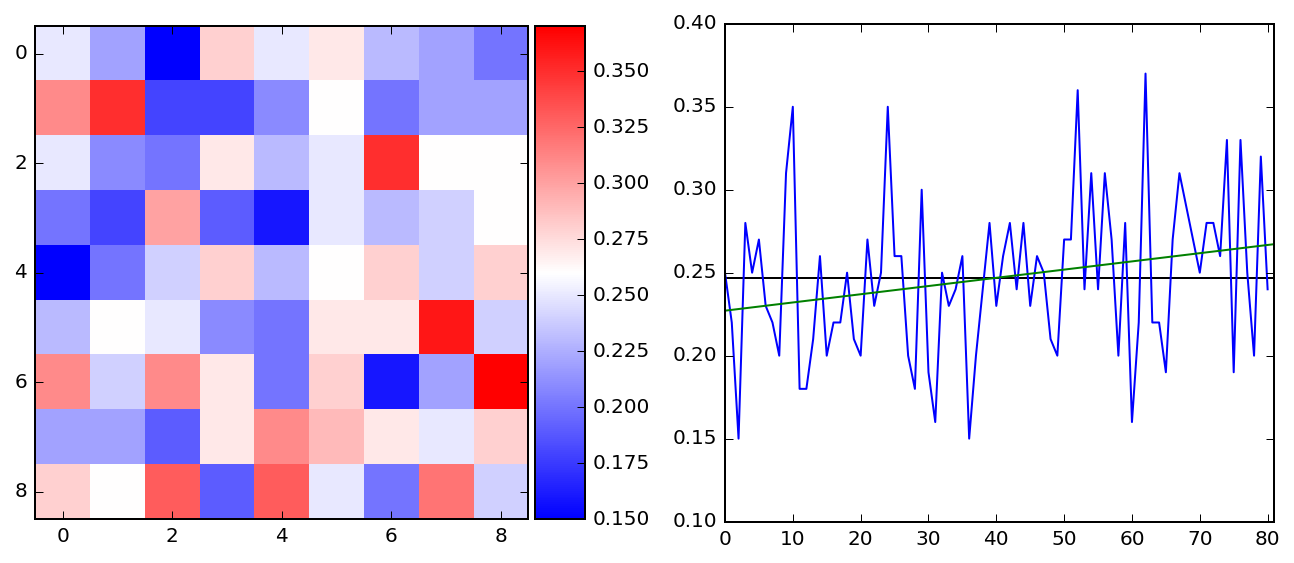

In [27]:
b = np.zeros((9, 9))
N = 100
n_mines = 20
for n in range(N):
    b += pythonic_mines(*b.shape, n_mines)
    
b /= N
average = n_mines/float(b.shape[0]*b.shape[1])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9.1,4))

im = ax1.imshow(b, interpolation='nearest', cmap=plt.cm.bwr)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="10%", pad=0.05)
plt.colorbar(im, cax=cax1)

ax2.hlines(average, xmin=0, xmax=b.shape[0]*b.shape[1])
ax2.plot(b.ravel())
ax2.set_xlim(0, b.shape[0]*b.shape[1])

y = b.ravel()
(m, b), _ = fit(range(y.shape[0]), y)
x = np.linspace(0, y.shape[0], 100)
ax2.plot(x, m*x + b)

f.tight_layout()

print('Average should be: %.3f'%(average))